## [Exp-02]Sklearn Linear Regression

### 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

#### (1) 데이터 가져오기

- <span style = "color: #0000FF">sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.</span>
- <span style = "color: #0000FF">diabetes의 data를 df_X에, target을 df_y에 저장해주세요.</span>

In [2309]:
import sklearn
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

df_X=diabetes.data
df_y=diabetes.target

#### (2) 모델에 입력할 데이터 X 준비하기

- <span style = "color: #0000FF">df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.</span>
  - 이미 float을 가지는 ndarray 타입입니다.

In [2310]:
print(type(df_X))
print(df_X.shape)
print(type(df_X[0]))
print(df_X[0])
print(type(df_X[0][0]))
df_X[0][0]

<class 'numpy.ndarray'>
(442, 10)
<class 'numpy.ndarray'>
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
<class 'numpy.float64'>


0.038075906433423026

#### (3) 모델에 입력할 데이터 y 준비하기

- <span style = "color: #0000FF">df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.</span>
  - 이미 float을 가지는 ndarray 타입입니다.

In [2311]:
print(type(df_y))
print(df_y.shape)
print(type(df_y[0]))
df_y[0]

<class 'numpy.ndarray'>
(442,)
<class 'numpy.float64'>


151.0

#### (4) train 데이터와 test 데이터로 분리하기

- <span style = "color: #0000FF">X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.</span>
  - train : test = 0.75 : 0.25 로 나누고 random_state = 42 로 둡니다.

In [2312]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


#### (5) 모델 준비하기

- <span style = "color: #0000FF">입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.</span>
  - 위의 shape에서 (331, 10) 이므로 feature가 10개군요
  - 10개의 W와 b값을 준비해야합니다.
- <span style = "color: #0000FF">모델 함수를 구현해주세요.</span>

In [2313]:
# 가중치 W와 b 준비
import numpy as np

W = np.random.rand(10)
b = np.random.rand()
print(W,b,sep = "\n")

[0.10942233 0.60147535 0.19364664 0.01173808 0.31198308 0.34638522
 0.51342667 0.02395811 0.31501486 0.60219747]
0.9923055482391934


In [2314]:
# 모델 함수 구현

def model(X, W, b):
    predictions = 0
    for i in range(10): # W가 10개 이므로 10번 반복
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

#### (6) 손실함수 loss 정의하기

- <span style = "color: #0000FF">손실함수를 MSE 함수로 정의해주세요.</span>

In [2315]:
# a,b = 실제값, 예측값
def MSE(a,b):
    value = ((a-b)**2).mean()
    return value


def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

#### (7) 기울기를 구하는 gradient 함수 구현하기

- <span style = "color: #0000FF">기울기를 계산하는 gradient 함수를 구현해주세요.</span>  
  - 편미분을 활용한 함수를 만들어보겠습니다.

In [2316]:
def gradient(X, W, b, y):
    N = len(W)
    y_pred = model(X,W,b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

#### (8) 하이퍼 파라미터인 학습률 설정하기

- <span style = "color: #0000FF">학습률, learning rate 를 설정해주세요</span>  
  - 처음에는 1로 해보겠습니다.
- <span style = "color: #0000FF">만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.</span> 
  -  1 -> 0.1 -> 0.01 -> 0.75

In [2317]:
# 학습률 설정
LEARNING_RATE = 1

#### (9) 모델 학습하기

- <span style = "color: #0000FF">정의된 손실함수와 기울기 함수로 모델을 학습해주세요.</span>  
- <span style = "color: #0000FF">loss값이 충분히 떨어질 때까지 학습을 진행해주세요.</span>
  - 30 -> 1000 -> 10000 -> 2000
- <span style = "color: #0000FF">입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.</span>  

In [2318]:
losses = []

for i in range(1, 31):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %10 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))

Iteration 1 : Loss 27963.68
Iteration 10 : Loss 27709.96
Iteration 20 : Loss 28657.80
Iteration 30 : Loss 29689.48


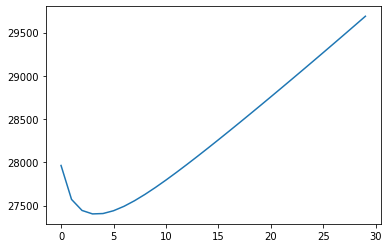

In [2319]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

그래프로 표현해보니 감소하다가 증가해버리네요.    
LEARNING_RATE 값을 너무 크게 줘서 넘어가버린거 같습니다.  
이번에는 LEARNING_RATE를 0.1로 주겠습니다.

Iteration 1 : Loss 20848.47
Iteration 10 : Loss 4605.40
Iteration 20 : Loss 3750.92
Iteration 30 : Loss 3467.25


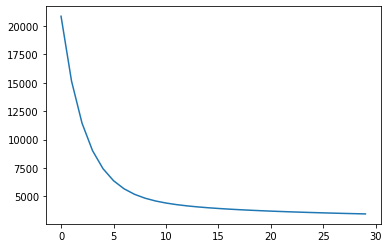

In [2320]:
W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.1

losses = []

for i in range(1, 31):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %10 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))
        
plt.plot(losses)
plt.show()

아 이번에는 확실히 값이 줄었습니다.  
혹시 모르니 LEARNING_RATE를 0.01로도 주겠습니다.

Iteration 1 : Loss 28807.49
Iteration 10 : Loss 21583.21
Iteration 20 : Loss 16061.53
Iteration 30 : Loss 12330.56


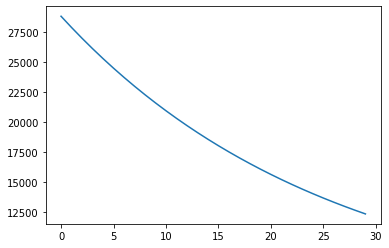

In [2321]:
W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.01

losses = []

for i in range(1, 31):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %10 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))
        
plt.plot(losses)
plt.show()

역시 줄긴 했지만 최종 loss 값이 0.1때보다 높습니다.  
아무래도 값을 너무 낮게 준거 같군요.  
0.1과 1사이를 넣어볼까요? - 0.75

Iteration 1 : Loss 10434.20
Iteration 10 : Loss 3049.28
Iteration 20 : Loss 2951.40
Iteration 30 : Loss 2938.45


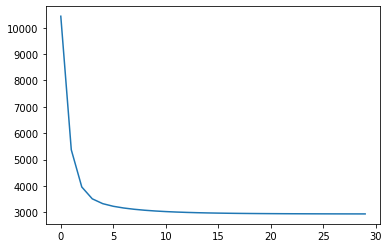

In [2322]:
W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 31):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %10 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))
        
plt.plot(losses)
plt.show()

0.1때 보다 최종 loss 값이 줄었습니다!  
이제 횟수를 늘려서 좀더 loss 값을 줄여보겠습니다. -> 1000

Iteration 1 : Loss 10420.94
Iteration 100 : Loss 2931.65
Iteration 200 : Loss 2926.93
Iteration 300 : Loss 2923.13
Iteration 400 : Loss 2920.06
Iteration 500 : Loss 2917.59
Iteration 600 : Loss 2915.59
Iteration 700 : Loss 2913.98
Iteration 800 : Loss 2912.68
Iteration 900 : Loss 2911.63
Iteration 1000 : Loss 2910.79


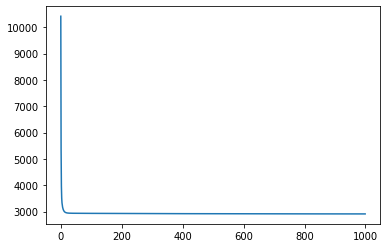

In [2323]:
W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %100 == 0:
        print('Iteration %d : Loss %0.2f' % (i, L))
        
plt.plot(losses)
plt.show()

loss 값이 계속 줄고 있습니다. 횟수를 계속 늘려볼까요? -> 10000

Iteration 1 : Loss 10452.9606
Iteration 1000 : Loss 2910.7896
Iteration 2000 : Loss 2907.6703
Iteration 3000 : Loss 2907.3059
Iteration 4000 : Loss 2907.2634
Iteration 5000 : Loss 2907.2584
Iteration 6000 : Loss 2907.2578
Iteration 7000 : Loss 2907.2578
Iteration 8000 : Loss 2907.2578
Iteration 9000 : Loss 2907.2578
Iteration 10000 : Loss 2907.2578


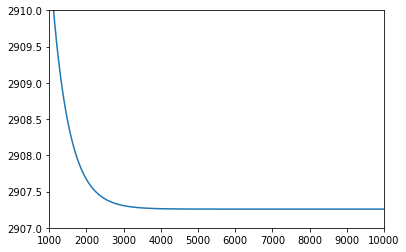

In [2324]:

W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.xlim(1000, 10000)
plt.ylim(2907, 2910)
plt.plot(losses)
plt.show()

2000번 이후로는 소수점 자리만 바뀔 뿐, 큰 변화가 없습니다.  
2000번 정도만 해도 충분할 거 같네요.

Iteration 1 : Loss 10412.6601
Iteration 200 : Loss 2926.9151
Iteration 400 : Loss 2920.0520
Iteration 600 : Loss 2915.5851
Iteration 800 : Loss 2912.6777
Iteration 1000 : Loss 2910.7854
Iteration 1200 : Loss 2909.5538
Iteration 1400 : Loss 2908.7522
Iteration 1600 : Loss 2908.2304
Iteration 1800 : Loss 2907.8908
Iteration 2000 : Loss 2907.6698


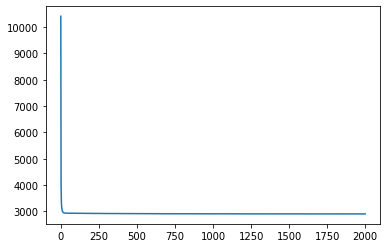

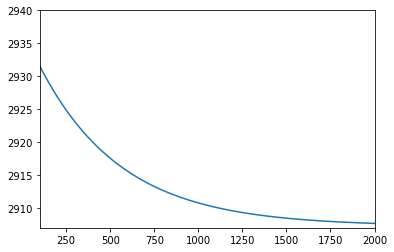

In [2325]:
W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

plt.xlim(100, 2000)
plt.ylim(2907, 2940)
plt.plot(losses)
plt.show()

df_X에서 제거해도 무방할 column이 있을까요?  
diabetes의 feature들에 대해 알아봅시다.  
[diabetes dataset 정보](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [2326]:
print(diabetes.keys())
diabetes.feature_names

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

* age :age in years
* sex
* bmi : body mass index
* bp : average blood pressure
* s1 : tc, total serum cholesterol
* s2 : ldl, low-density lipoproteins
* s3 : hdl, high-density lipoproteins
* s4 : tch, total cholesterol / HDL
* s5 : ltg, possibly log of serum triglycerides level
* s6 : glu, blood sugar level  
  
이런 내용들이네요. sex column만 제거 해볼까요?  
np.delete를 사용해 2번째 열인 sex를 삭제해봅시다.

In [2327]:
import pandas as pd

df_X=diabetes.data
print(df_X.shape)
print(df_X[0])
new_df_X = np.delete(df_X, 1, axis =1)
print(new_df_X.shape)
print(new_df_X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
(442, 9)
[ 0.03807591  0.06169621  0.02187239 -0.0442235  -0.03482076 -0.04340085
 -0.00259226  0.01990749 -0.01764613]


정상적으로 삭제가 되었군요. 근데 여기까지 만들었던 형식은 다 feature가 10개인 기준으로 만들었습니다.  
9개인 기준으로 다시 만들어볼까요.  
나머지는 마지막에 실험하였던 LEARNING_RATE = 0.75, 2000번으로 하겠습니다.

(331, 9) (111, 9)
Iteration 1 : Loss 10325.0564
Iteration 200 : Loss 3031.1583
Iteration 400 : Loss 3024.4472
Iteration 600 : Loss 3020.2948
Iteration 800 : Loss 3017.7187
Iteration 1000 : Loss 3016.1204
Iteration 1200 : Loss 3015.1288
Iteration 1400 : Loss 3014.5135
Iteration 1600 : Loss 3014.1318
Iteration 1800 : Loss 3013.8949
Iteration 2000 : Loss 3013.7480


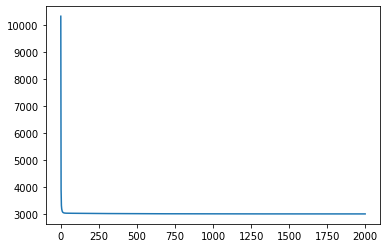

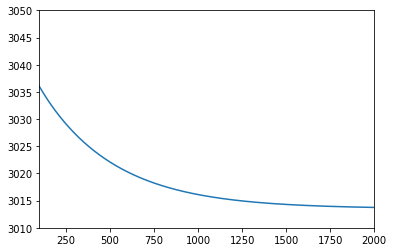

In [2328]:
X_train, X_test, y_train, y_test = train_test_split(new_df_X, df_y, test_size=0.25, random_state=42)

def model(X, W, b):
    predictions = 0
    for i in range(9): # W가 9개로 변경되었으므로 9번 반복
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

print(X_train.shape, X_test.shape)

W = np.random.rand(9) # 10개에서 9개로 변경
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

plt.xlim(100, 2000)
plt.ylim(3010, 3050)
plt.plot(losses)
plt.show()

오히려 마지막 loss 값이 증가해버렸군요.  
그대로 column들을 냅두는게 나을 것 같습니다.

#### (10) test 데이터에 대한 성능 확인하기

- <span style = "color: #0000FF">test 데이터에 대한 성능을 확인해주세요.</span>  


test 데이터의 성능을 확인하기 위해 loss의 결과가 가장 좋았던  
10개 열 모두 사용 + LEARNING_RATE = 0.75, 2천번을
가져오겠습니다.

In [2329]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.25, random_state=42)

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

print(X_train.shape, X_test.shape)

W = np.random.rand(10)
b = np.random.rand()
LEARNING_RATE = 0.75

losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i == 1 or i %200 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
print(W,b, sep = "\n")

(331, 10) (111, 10)
Iteration 1 : Loss 10439.8869
Iteration 200 : Loss 2926.9219
Iteration 400 : Loss 2920.0564
Iteration 600 : Loss 2915.5880
Iteration 800 : Loss 2912.6796
Iteration 1000 : Loss 2910.7866
Iteration 1200 : Loss 2909.5546
Iteration 1400 : Loss 2908.7527
Iteration 1600 : Loss 2908.2308
Iteration 1800 : Loss 2907.8911
Iteration 2000 : Loss 2907.6700
[  48.35108976 -241.74461476  534.00442997  380.85118169 -820.39835641
  431.30641731   73.01840936  255.80967221  658.3527213    27.07019428]
151.6578301312525


이제 성능을 확인하기 위해 test data를 loss에 넣어봅시다.

In [2330]:
loss(X_test,W,b,y_test)

2846.126265750535

train시 가장 낮았던 loss 값과 유사하게 나왔군요.

#### (11) 정답 데이터와 예측한 데이터 시각화하기


- <span style = "color: #0000FF">x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.</span>  

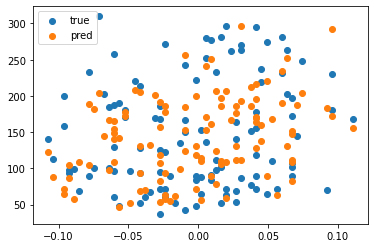

In [2331]:
prediction = model(X_test,W,b)
plt.scatter(X_test[:, 0], y_test, label = 'true')
plt.scatter(X_test[:, 0], prediction, label = 'pred')
plt.legend()
plt.show()

결과들이 서로 비슷하면서 다르게 나왔습니다!  
그래도 완전히 동떨어진 결과는 아니네요.

### 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

#### (1) 데이터 가져오기

- <span style = "color: #0000FF">터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.</span>
  - local의 data 폴더에 다운로드하여서 사용하도록 하겠습니다.
  - DataFrame으로 만들기 위해 pandas 라이브러리가 필요합니다.
- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)<span style = "color: #0000FF">에서 데이터를 상세히 확인할 수 있습니다.</span>

In [2332]:
import pandas as pd

train = pd.read_csv("/home/aiffel/Code/Exploration Submit/2/data/train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


train은 12개의 컬럼을 가지고있고 datetime을 제외하고는 다 숫자인것 같습니다.

#### (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- <span style = "color: #0000FF">to_datetime 활용 :</span> [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) <span style = "color: #0000FF">참조</span> 
- <span style = "color: #0000FF">pandas datetime extract year month day 키워드로 검색해 보기</span>

In [2333]:
# triain의 datetime 열을 datatime 형태로 만들어 줍니다.
train['datetime'] = pd.to_datetime(train['datetime'])
# dt.시간을 통해 새로운 열에 맞는 시간들을 넣습니다.
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second
# 확인용 출력
train[['datetime','year','month','day','hour','minute','second']]

,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0
...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,2012,12,19,22,0,0


#### (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- <span style = "color: #0000FF">sns.countplot 활용해서 시각화하기</span>
  - [seabron document](https://seaborn.pydata.org/generated/seaborn.countplot.html)를 참고하였습니다.
  - seaborn을 먼저 import 합니다.
  - countplot (x = "데이터의 열의 이름" , data = 해당 데이터프레임 , ax = subplot 위치) 로 지정합니다.
- <span style = "color: #0000FF">subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기</span>
  - [matplotlib document](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)를 참고하였습니다.
  - subplot(행,열)로 만들고 그래프 만들때 ax 값을 지정해줍니다.
  - fig.set_figheight와 fig.set_figwidth로 그래프 전체 크기를 늘려주었습니다.

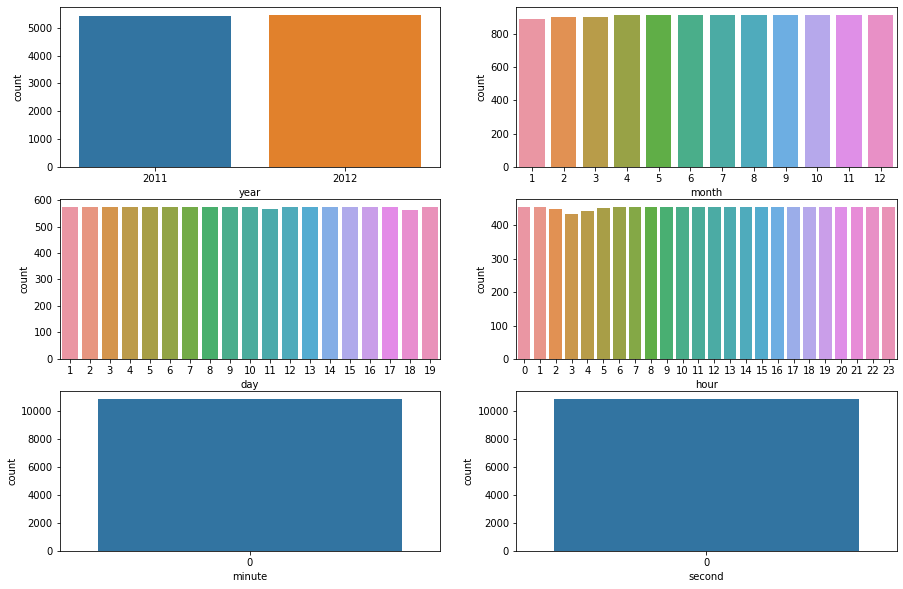

In [2334]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2)
fig.set_figheight(10)
fig.set_figwidth(15)

sns.countplot(x = 'year', data =  train[['year']], ax = axes[0][0])
sns.countplot(x = 'month', data =  train[['month']], ax = axes[0][1])
sns.countplot(x = 'day', data =  train[['day']], ax = axes[1][0])
sns.countplot(x = 'hour', data =  train[['hour']], ax = axes[1][1])
sns.countplot(x = 'minute', data =  train[['minute']], ax = axes[2][0])
sns.countplot(x = 'second', data =  train[['second']], ax = axes[2][1])

plt.show()

#### (4) X, y 컬럼 선택 및 train/test 데이터 분리

- <span style = "color: #0000FF">X (feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다  
  데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다.  
  만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다.  
  ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?</span>
  - 먼저 그럼 columns들을 나열하고 [document](https://www.kaggle.com/c/bike-sharing-demand/data)에서 내용을 봅시다.
- <span style = "color: #0000FF">count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기</span>

In [2335]:
print(train.shape)
print(train.columns)
train.tail()

(10886, 18)
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


* datetime - hourly date + timestamp  
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals
* year, month, day, hour, minute, second : 위에서 추가한 열입니다.

train에서는 columns 을 빼야할까요?
- 일단 datatime은 year ~ second로 분할하여 만들어주었으니 제거해야합니다.
- count 또한 우리가 맞추고자하는 target 값이므로 제거합니다.
- 위에 나왔듯이 casul과 registered 내용이 count에 큰 영향이 없어보이므로 제거합니다.
- holiday-workingday 와 temp-atemp 가 조금 의문입니다, 과연 둘다 필요한 것 일까요?
- temp 와 atmep 는 실제 온도와 체감 온도 입니다. 저는 체감온도만 있으면 충분하다고 생각하여 실제온도인 temp를 제거하겠습니다.
- holiday-workingday 는 만약 두 계수가 완전히 반대라면 굳이 둘다 있을 필요는 없습니다. 이를 확인해보겠습니다.
    - 두 수가 반대라면 두 계수를 더한 값이 무조건 1이 나와야합니다.


In [2336]:
test = pd.DataFrame()
test[sum]=train[['holiday','workingday']].sum(axis =1)
a = (test[sum] == 0)
print(len(test[a]))
b = (test[sum] == 2)
print(len(test[b]))

3163
0


holiday-workingday 합이 0인 값이 있군요.  
holiday - whether the day is considered a holiday  
workingday - whether the day is neither a weekend nor holiday  
합이 0인 것은 holiday가 아닌 weekend을 가리키는 것 같습니다.  
결국 2 column이 서로 다르군요. 두 column 다 남기도록 하겠습니다.  
이제 위에서 언급한 column 을 지우도록 하겠습니다.  
datetime, temp, casul, registered, count(target) : 18 - 5 = 13

In [2337]:
X = train[['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity', 'windspeed',
           'year', 'month', 'day', 'hour', 'minute', 'second']]
y = train['count']
print(X.shape)
# print(X)
print(y.shape)
# print(y)

(10886, 13)
(10886,)


In [2338]:
# train, test를 분리해줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8164, 13)
(8164,)
(2722, 13)
(2722,)


#### (5) LinearRegression 모델 학습

- <span style = "color: #0000FF">sklearn의 LinearRegression 모델 불러오기 및 학습하기</span>
  - [링크](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)를 참고해서 파라미터를 바꿔주고 싶은데 딱히 바꿀게 없어보입니다.

In [2339]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- <span style = "color: #0000FF">학습된 모델에 X_test를 입력해서 예측값 출력하기</span>
- <span style = "color: #0000FF">모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기</span>
- <span style = "color: #0000FF">mse 값과 함께 rmse 값도 계산하기</span>
  - [sklearn doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)를 참고했습니다.

In [2340]:
prediction = model.predict(X_test)

print(prediction.shape)
print(prediction)

# MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction)
print('MSE =',mse)
# RMSE
rmse = mean_squared_error(y_test,prediction,squared=False)
print('RMSE =',rmse)

(2722,)
[249.69126211  48.90014762 201.60420313 ... 119.68349895 163.82852336
  66.45835261]
MSE = 20102.044959875962
RMSE = 141.78168062156678


#### (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- <span style = "color: #0000FF">x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기</span>
- <span style = "color: #0000FF">x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기</span>
  - [링크](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html)를 참고하였습니다.

앗,, temp를 통해 시각화를 해야하는데 저는 이미 temp를 지운 상태입니다.  
일단 temp 대신 atemp로 시각화를 해보겠습니다.

In [2341]:
X_test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

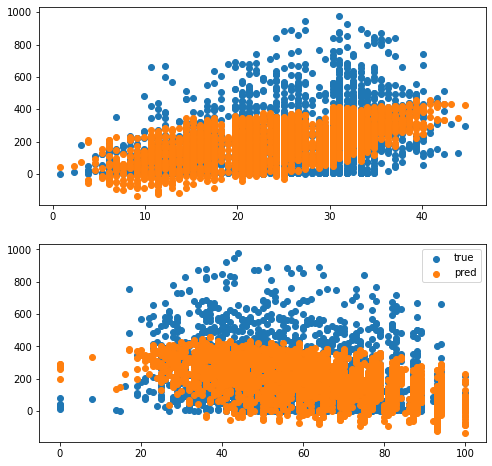

In [2342]:
fig, axes = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(8)

axes[0].scatter(X_test['atemp'], y_test, label = 'true')
axes[0].scatter(X_test['atemp'], prediction, label = 'pred')

axes[1].scatter(X_test['humidity'], y_test, label = 'true')
axes[1].scatter(X_test['humidity'], prediction, label = 'pred')
plt.legend()
plt.show()

temp도 한번 넣어서 다시 돌려봅시다

In [2343]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute', 'second']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)

model = LinearRegression()
model.fit(X_train,y_train)

prediction = model.predict(X_test)

# MSE
mse = mean_squared_error(y_test,prediction)
print('MSE =',mse)
# RMSE
rmse = mean_squared_error(y_test,prediction,squared=False)
print('RMSE =',rmse)

(8164, 14)
MSE = 20091.37230644371
RMSE = 141.74403799258616


오히려 MSE(RMSE)가 줄었군요.  
그래프를 그려봅시다

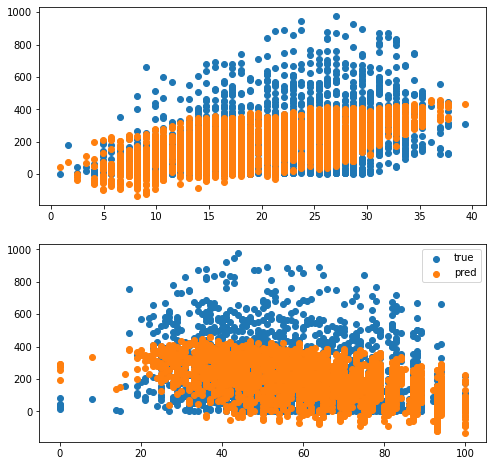

In [2344]:
fig, axes = plt.subplots(2)
fig.set_figheight(8)
fig.set_figwidth(8)

axes[0].scatter(X_test['temp'], y_test, label = 'true')
axes[0].scatter(X_test['temp'], prediction, label = 'pred')

axes[1].scatter(X_test['humidity'], y_test, label = 'true')
axes[1].scatter(X_test['humidity'], prediction, label = 'pred')
plt.legend()
plt.show()

### 회고

* 이번 프로젝트에서 어려웠던 점
    - subplots 활용에서 참고가 필요했습니다.
    - 루브릭 평가를 보기전 loss 값이 얼마나 더 내려 갈 수 있는지 몰라서 다양한 방법을 시도하다가 시간이 많이 소모되었습니다.
* 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점
  * 알게 된점
    - 무의미하다고 생각한 col 개수를 줄인다고 무조건 loss가 줄지는 않는다.
    - 데이터프레임[] = series , 데이터프레임[[]] = DataFrame
    - scatter 에서 축 넣을 때 numpy array 가 아닌 데이터프레임의 열이면 index 숫자로 접근하지말고 열 이름으로 해야한다.
    - scatter 와 counterplot 은 subplot 쓸 때 다르게 넣는다. 
    - 생각보다 loss 값이 높을 수 있다.(MSE기준)
  * 아직 모호한 점
    - 위에서 사용한 방법이 아닌 어떤 방법을 써야 loss 값을 확실히 더 줄일 수 있는지 궁금합니다.(2500까지 가능한건가요??)
* 루브릭 평가를 맞추기 위해 시도한 점
    - 손실 함수가 최소가 되기 위해 하이퍼파라미터나 반복, column 을 바꿔주면서 실험하였습니다.
    - 다양한 방법과 범위로 그래프를 그려보았습니다.